## **tSNE with colors**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/student_grades.csv')

In [3]:
grades = data.drop('student_id',axis=1)

In [9]:
## Fit the dataset with KMeans clustering
from sklearn.cluster import KMeans

KM = KMeans(n_clusters=3, n_init='auto', random_state=42)
KM.fit(grades)

labels = KM.labels_
centroids = KM.cluster_centers_

In [14]:
## Overlay the 3 clusters onto a t-SNE plot
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(grades), columns=['component1','component2'])

<Axes: xlabel='component1', ylabel='component2'>

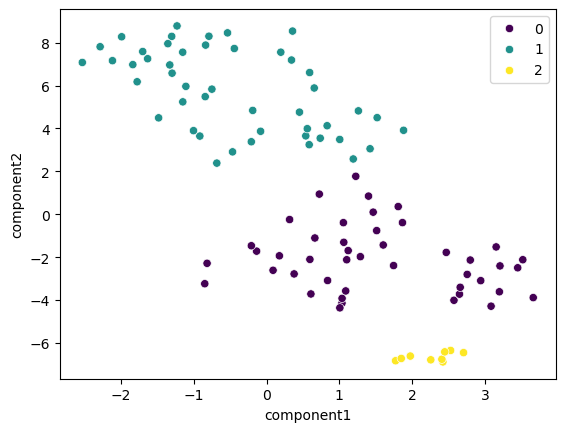

In [16]:
sns.scatterplot(
    data=df_tsne,
    x='component1',
    y='component2',
    hue=labels,
    palette='viridis'
)

In [17]:
## Interpret the cluster centers
centroids_df = pd.DataFrame(centroids, columns=grades.columns)

centroids_df

,math,science,cs,band,english,history,spanish,physed
0,57.113636,57.795455,56.386364,70.681818,71.886364,74.795455,77.181818,68.522727
1,42.702128,42.765957,43.042553,69.765957,45.765957,47.957447,49.234043,66.574468
2,87.222222,85.444444,85.666667,68.333333,87.000000,90.555556,94.000000,68.555556


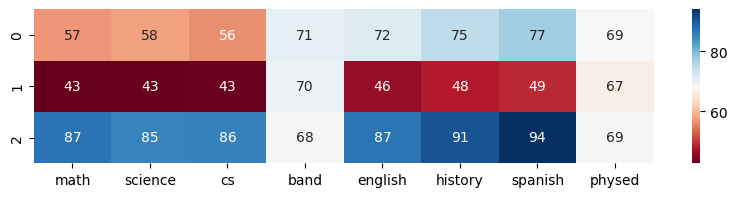

In [18]:
## Create heatmap
plt.figure(figsize=(10,2))
sns.heatmap(
    data=centroids_df,
    annot=True,
    fmt='.2g',
    cmap='RdBu'
)
plt.show();

## Interpretation
 - Cluster 1: Moderate Maths, Science and cs grades
 - Cluster 2: Poor in all subjects
 - Cluster 3: Strong in all subjects